(sec:pandas10min_2)=
# 판다스 10분 완성 2부


**필수 라이브러리**

In [1]:
import numpy as np
import pandas as pd

## 합병과 결합: merge-join-concat

- 참고: [Merging section](https://pandas.pydata.org/docs/user_guide/merging.html#merging)

### 종/횡 결합: `pd.concat()` 함수

`pd.concat()` 함수는 여러 개의 데이터프레임을 하나로 합친다.

- `axis=0`: 종 결합. 즉 데이터프레임 여러 개의 위아래 결합.

In [2]:
df1 = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    },
    index=[0, 1, 2, 3],
)

df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [3]:
df2 = pd.DataFrame(
    {
        "A": ["A4", "A5", "A6", "A7"],
        "B": ["B4", "B5", "B6", "B7"],
        "C": ["C4", "C5", "C6", "C7"],
        "D": ["D4", "D5", "D6", "D7"],
    },
    index=[4, 5, 6, 7],
)

df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [4]:
df3 = pd.DataFrame(
    {
        "A": ["A8", "A9", "A10", "A11"],
        "B": ["B8", "B9", "B10", "B11"],
        "C": ["C8", "C9", "C10", "C11"],
        "D": ["D8", "D9", "D10", "D11"],
    },
    index=[8, 9, 10, 11],
)

df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [5]:
pd.concat([df1, df2, df3]) # axis=0 이 기본값

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


- `axis=1`: 횡 결합. 즉 데이터프레임 여러 개의 좌우 결합.

In [6]:
df4 = pd.DataFrame(
    {
        "B": ["B2", "B3", "B6", "B7"],
        "D": ["D2", "D3", "D6", "D7"],
        "F": ["F2", "F3", "F6", "F7"],
    },
    index=[2, 3, 6, 7],
)

df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [7]:
pd.concat([df1, df4], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


인덱스를 기존의 데이터프레임과 통일시키기 위해 리인덱싱을 활용할 수도 있다.

In [8]:
df1.index

Int64Index([0, 1, 2, 3], dtype='int64')

In [9]:
pd.concat([df1, df4], axis=1).reindex(df1.index)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [10]:
pd.concat([df1, df4.reindex(df1.index)], axis=1)

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


### 합병: `pd.merge()` 함수

`pd.merge()` 함수 는 SQL 방식으로 특정 열을 기준으로 두 개의 데이터프레임을 합친다.
다양한 옵션을 지원하는 매우 강력한 도구이다.

- 참고: [Database style joining](https://pandas.pydata.org/docs/user_guide/merging.html#merging-join)

**예제**

실습을 위해 아래 두 데이터프레임을 이용한다.

In [11]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})

In [12]:
left

,key,lval
0,foo,1
1,foo,2


In [13]:
right

,key,rval
0,foo,4
1,foo,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목 각각에 대해 다른 열에서 해당 항목과 연관된 값들을 조합할 수 있는 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 2개의 값이,
        `rval` 열에서 2개의 값이 있기에 `foo`와 관련해서 총 4개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1, 2` | `4, 5` | 4 |

In [14]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


**예제**

In [15]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})

In [16]:
left

,key,lval
0,foo,1
1,bar,2


In [17]:
right

,key,rval
0,foo,4
1,bar,5


- `on="key"` 키워드 인자
    - `key` 열에 사용된 항목별로 모든 경우의 수를 다룬다.
    - `foo` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    - `bar` 값에 대해 `lval` 열에서 1개의 값이,
        `rval` 열에서 1개의 값이 있기에 `foo`와 관련해서 총 1개의 경우가 생성된다.
    <br><br>
    
    | `key` | `left.lval` | `right.rval` | 경우의 수 |
    | :---: | :---: | :---: | :---: |
    | `foo` | `1` | `4` | 1 |        
    | `bar` | `2` | `5` | 1 |        

In [18]:
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


**예제**

경우의 수는 지정된 열의 항목이 사용된 횟수를 기준으로 한다. 

In [19]:
left = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

In [20]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [21]:
right = pd.DataFrame(
    {
        "key": ["K0", "K1", "K2", "K3"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

In [22]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


| `key` | (`left.A`, `left.B`) | (`right.C`, `right.D`) | 경우의 수 |
| :---: | :---: | :---: | :---: |
| `K0` | (`A0`, `B0`) | (`C0`, `D0`) | 1 |
| `K1` | (`A1`, `B1`) | (`C1`, `D1`) | 1 |
| `K2` | (`A2`, `B2`) | (`C2`, `D2`) | 1 |
| `K3` | (`A3`, `B3`) | (`C3`, `D3`) | 1 |

In [23]:
result = pd.merge(left, right, on="key")
result

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


**다양한 키워드 인자**

In [24]:
left = pd.DataFrame(
    {
        "key1": ["K0", "K0", "K1", "K2"],
        "key2": ["K0", "K1", "K0", "K1"],
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
    }
)

left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [25]:
right = pd.DataFrame(
    {
        "key1": ["K0", "K1", "K1", "K2"],
        "key2": ["K0", "K0", "K0", "K0"],
        "C": ["C0", "C1", "C2", "C3"],
        "D": ["D0", "D1", "D2", "D3"],
    }
)

right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


- `how='inner'`: 지정된 키의 교집합 대상

In [26]:
result = pd.merge(left, right, on=["key1", "key2"]) # how='inner' 가 기본값
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [27]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


- `how='outer'`: 지정된 키의 합집합 대상

In [28]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


- `how='left'`: 왼쪽 데이터프레임의 키에 포함된 항목만 대상

In [29]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [30]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


- `how='right'`: 오른쪽 데이터프레임의 키에 포함된 항목만 대상

In [31]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [32]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


- `how='cross'`: 모든 경우의 수 조합

In [33]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### 합병: `DataFrame.join()` 메서드

인덱스를 기준으로 두 개의 데이터프레임을 합병할 때 사용한다.

In [34]:
left = pd.DataFrame(
    {"A": ["A0", "A1", "A2"], "B": ["B0", "B1", "B2"]}, index=["K0", "K1", "K2"]
)

left

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [35]:
right = pd.DataFrame(
    {"C": ["C0", "C2", "C3"], "D": ["D0", "D2", "D3"]}, index=["K0", "K2", "K3"]
)

right

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [36]:
left.join(right)

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


아래와 같이 `pd.merge()` 함수를 이용한 결과와 동일하다.

In [37]:
pd.merge(left, right, left_index=True, right_index=True, how='left')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


`pd.merge()` 함수의 키워드 인자를 동일하게 사용할 수 있다.

- `how='outer'`

In [38]:
left.join(right, how="outer")

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


아래 코드가 동일한 결과를 낸다.

In [39]:
pd.merge(left, right, left_index=True, right_index=True, how='outer')

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


- `how='inner'`

In [40]:
left.join(right, how="inner")

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


아래 코드가 동일한 결과를 낸다.

In [41]:
pd.merge(left, right, left_index=True, right_index=True, how='inner')

,A,B,C,D
K0,A0,B0,C0,D0
K2,A2,B2,C2,D2


## 다중 인덱스<font size='2'>MultiIndex</font>

다중 인덱스를 이용하여 데이터를 보다 체계적으로 다를 수 있다.
또한 이어서 다룰 그룹 분류<font size='2'>Group by</font>, 
모양 변환<font size='2'>reshaping</font>, 
피벗 변환<font size='2'>pivoting</font> 등에서 유용하게 활용된다.

### `MultiIndex` 객체

다중 인덱스 객체는 보통 튜플을 이용한다.
예를 들어 아래 두 개의 리스트를 이용하여 튜플을 생성한 다음 다중 인덱스로 만들어보자.

In [42]:
arrays = [
    ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
    ["one", "two", "one", "two", "one", "two", "one", "two"],
]

- 튜플 생성: 항목 8개

In [43]:
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

- 다중 인덱스 생성
- `names` 키워드 인자: 다중 인덱스의 각 레벨<font size='2'>level</font>의 이름 지정. 지정되지 않으면 `None`으로 처리됨.
    예를 들어 아래 코드에서 사용된 레벨별 이름은 다음과 같음.
    - `"first"`: 0-레벨 이름
    - `"second"`: 1-레벨 이름

In [44]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

### 다중 인덱스 라벨

- 시리즈 생성

아래 코드는 길이가 8인 어레이를 이용하여 시리즈를 생성한다.
인덱스의 라벨은 다중 인덱스가 사용된다.

In [45]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -1.098919
       two       0.586408
baz    one      -0.017812
       two       0.387825
foo    one       0.475875
       two      -0.799011
qux    one      -1.934579
       two       1.225975
dtype: float64

- 데이터프레임 생성

아래 코드는 8개의 행으로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.
`index` 또는 `columns`로 여러 개의 리스트로 구성된 어레이를 지정하면
자동으로 다중 인덱스 라벨이 지정된다.

In [46]:
df = pd.DataFrame(np.random.randn(8, 4), index=arrays)
df

0         1         2         3
bar one  1.188596  0.196234 -0.078824 -0.502658
    two  0.257953  0.499214  0.546764  1.359612
baz one -0.090657  1.922955 -0.104927  0.294555
    two -0.759646  0.679877 -0.624379  0.226299
foo one  0.941443 -0.560021 -0.214438  1.533584
    two  1.086207  0.528776 -1.264328  1.176856
qux one  1.278655 -0.902780 -0.194328  0.428141
    two  0.630998  0.389398  0.617051 -0.121385

다중 인덱스를 열 라벨로도 활용할 수 있다.
아래 코드는 8개의 열로 이뤄진 2차원 어레이를 이용하여 데이터프레임을 생성한다.

In [47]:
df1 = pd.DataFrame(np.random.randn(3, 8), index=["A", "B", "C"], columns=index)
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       1.861403  0.719697  0.946876  0.977294  0.115123  1.754479  0.299616   
B      -3.051696 -0.429005  0.567416  1.461938  0.442430  0.793401 -0.050911   
C      -0.402539  0.494595  0.073238  0.300241  0.909874 -1.742559  0.420568   

first             
second       two  
A       2.072473  
B       0.380521  
C       0.403575

인덱스 라벨과 열 라벨 모두 다중 인덱스를 이용할 수도 있다.

In [48]:
arrays2 = [
    ["toto", "toto", "titi", "titi", "tata", "tata"],
    ["A", "B", "A", "B", "A", "B"],
]

In [49]:
pd.DataFrame(np.random.randn(6, 6), index=index[:6], columns=arrays2)

toto                titi                tata          
                     A         B         A         B         A         B
first second                                                            
bar   one     0.793930  0.258969 -0.088164  0.891092 -0.943673 -0.386247
      two     0.103413  0.921195 -0.091599  0.794576  0.818202 -0.606446
baz   one     0.355227 -1.959771 -0.500102  0.618771 -1.001218  2.186508
      two    -0.759322 -0.462374  0.446179 -0.630193  0.926117  0.134012
foo   one     0.597480 -1.722617  0.732015 -0.574702 -0.541135  0.377591
      two     0.563823 -0.436540 -1.332440  0.150695 -0.491245  0.422011

**주의사항**

튜플을 라벨로 사용하는 것은 다중 인덱스와 아무 상관 없다.
단지 라벨이 튜플인 것 뿐이다.

In [50]:
pd.Series(np.random.randn(8), index=tuples)

(bar, one)    0.079956
(bar, two)   -0.154996
(baz, one)   -1.771097
(baz, two)    0.164256
(foo, one)    0.234619
(foo, two)   -1.722097
(qux, one)   -0.978334
(qux, two)   -0.080839
dtype: float64

### 인덱스 레벨

다중 인덱스 객체의 `get_level_values()` 메서드를 이용하여 레벨별 인덱스 라벨을 확인할 수 있다.

- 0-레블 인덱스

In [51]:
index.get_level_values(0)

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

레벨 이름을 이용할 수도 있다.

In [52]:
index.get_level_values("first")

Index(['bar', 'bar', 'baz', 'baz', 'foo', 'foo', 'qux', 'qux'], dtype='object', name='first')

- 1-레블 인덱스

In [53]:
index.get_level_values(1)

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

In [54]:
index.get_level_values("second")

Index(['one', 'two', 'one', 'two', 'one', 'two', 'one', 'two'], dtype='object', name='second')

### 인덱싱

다중 인덱스를 라벨로 사용하는 시리즈와 데이터프레임의 인덱싱은 일반 인덱싱과 크게 다르지 않다.

- 시리즈 인덱싱

In [55]:
s

first  second
bar    one      -1.098919
       two       0.586408
baz    one      -0.017812
       two       0.387825
foo    one       0.475875
       two      -0.799011
qux    one      -1.934579
       two       1.225975
dtype: float64

In [56]:
s["qux"]

second
one   -1.934579
two    1.225975
dtype: float64

- 데이터프레임 인덱싱: 인덱스 라벨이 다중 인덱스인 경우

In [57]:
df

0         1         2         3
bar one  1.188596  0.196234 -0.078824 -0.502658
    two  0.257953  0.499214  0.546764  1.359612
baz one -0.090657  1.922955 -0.104927  0.294555
    two -0.759646  0.679877 -0.624379  0.226299
foo one  0.941443 -0.560021 -0.214438  1.533584
    two  1.086207  0.528776 -1.264328  1.176856
qux one  1.278655 -0.902780 -0.194328  0.428141
    two  0.630998  0.389398  0.617051 -0.121385

In [58]:
df.loc["bar"]

,0,1,2,3
one,1.188596,0.196234,-0.078824,-0.502658
two,0.257953,0.499214,0.546764,1.359612


레벨별로 라벨을 지정한다. 각각의 라벨은 쉼표로 구분한다.

In [59]:
df.loc["bar", "one"]

0    1.188596
1    0.196234
2   -0.078824
3   -0.502658
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다.

In [60]:
df.loc["bar"].loc["one"]

0    1.188596
1    0.196234
2   -0.078824
3   -0.502658
Name: one, dtype: float64

- 데이터프레임 인덱싱: 열 라벨이 다중 인덱스인 경우

In [61]:
df1

first        bar                 baz                 foo                 qux  \
second       one       two       one       two       one       two       one   
A       1.861403  0.719697  0.946876  0.977294  0.115123  1.754479  0.299616   
B      -3.051696 -0.429005  0.567416  1.461938  0.442430  0.793401 -0.050911   
C      -0.402539  0.494595  0.073238  0.300241  0.909874 -1.742559  0.420568   

first             
second       two  
A       2.072473  
B       0.380521  
C       0.403575

In [62]:
df1["bar"]

second,one,two
A,1.861403,0.719697
B,-3.051696,-0.429005
C,-0.402539,0.494595


레벨별로 라벨을 지정한다. 각각의 라벨은 쉼표로 구분한다.

In [63]:
df1["bar", "one"]

A    1.861403
B   -3.051696
C   -0.402539
Name: (bar, one), dtype: float64

아래와 같이 할 수도 있다

In [64]:
df1["bar"]["one"]

A    1.861403
B   -3.051696
C   -0.402539
Name: one, dtype: float64

## 그룹 분류: `pd.groupby()` 함수

- 참고: [Grouping section](https://pandas.pydata.org/docs/user_guide/groupby.html#groupby)

`pd.groupby()` 함수는 다음 3 기능을 제공한다.

- **분류**<font size='2'>Splitting</font>: 데이터를 조건에 따라 여러 그룹으로 분류
- **함수 적용**<font size='2'>Applying</font>: 그룹별로 함수 적용
- **조합**<font size='2'>Combining</font>: 그룹별 함수 적용 결과를 취합하여 새로운 데이터프레임/시리즈 생성

In [65]:
df = pd.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                         'foo', 'bar', 'foo', 'bar'],
                   'B': ['one', 'one', 'two', 'three',
                         'two', 'two', 'one', 'three'],
                   'C': np.random.randn(8),
                   'D': np.random.randn(8)})

df

,A,B,C,D
0,foo,one,1.185300,-0.732476
1,bar,one,1.057233,-0.055284
2,foo,two,0.962338,0.625680
3,bar,three,-1.761318,-0.335511
4,foo,two,-0.394826,-0.476860
5,bar,two,0.916959,1.038515
6,foo,one,1.181950,-1.994079
7,bar,three,-0.218941,-0.862302


- `A` 열에 사용된 항목 기준으로 그룹으로 분류한 후 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | 경우의 수 |
    | :---: | :---: |
    | `bar` | 1 |
    | `foo` | 1 |

In [66]:
df.groupby('A')[["C", "D"]].sum()

,C,D
A,,
bar,-0.006068,-0.214582
foo,2.934761,-2.577735


- `A`열의 항목과 `B` 열의 항목의 조합을 기준으로 그룹으로 그룹별로 `C`와 `D` 열의 모든 항목의 합 계산해서 새로운 데이터프레임 생성
    <br><br>
    
    | `A` | `B` | 경우의 수 |
    | :---: | :---: | :---: |
    | `bar` | `one`, `three`, `two` | 3 |
    | `foo` | `one`, `two` | 2 |

In [67]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one    1.057233 -0.055284
    three -1.980259 -1.197813
    two    0.916959  1.038515
foo one    2.367250 -2.726556
    two    0.567511  0.148820

**그룹 확인**

- `for` 반복문 활용 

In [68]:
for name, group in df.groupby(["A", "B"]):
    print(name)
    print(group)

('bar', 'one')
     A    B         C         D
1  bar  one  1.057233 -0.055284
('bar', 'three')
     A      B         C         D
3  bar  three -1.761318 -0.335511
7  bar  three -0.218941 -0.862302
('bar', 'two')
     A    B         C         D
5  bar  two  0.916959  1.038515
('foo', 'one')
     A    B        C         D
0  foo  one  1.18530 -0.732476
6  foo  one  1.18195 -1.994079
('foo', 'two')
     A    B         C        D
2  foo  two  0.962338  0.62568
4  foo  two -0.394826 -0.47686


- `get_group()` 메서드

In [69]:
df.groupby(["A", "B"]).get_group(('bar', 'one'))

,A,B,C,D
1,bar,one,1.057233,-0.055284


In [70]:
df.groupby(["A", "B"]).get_group(('bar', 'three'))

,A,B,C,D
3,bar,three,-1.761318,-0.335511
7,bar,three,-0.218941,-0.862302


- `groups` 속성

In [71]:
df.groupby(["A", "B"]).groups

{('bar', 'one'): [1], ('bar', 'three'): [3, 7], ('bar', 'two'): [5], ('foo', 'one'): [0, 6], ('foo', 'two'): [2, 4]}

- `value_counts` 속성

In [72]:
df.groupby(["A", "B"]).value_counts()

A    B      C          D        
bar  one     1.057233  -0.055284    1
     three  -1.761318  -0.335511    1
            -0.218941  -0.862302    1
     two     0.916959   1.038515    1
foo  one     1.181950  -1.994079    1
             1.185300  -0.732476    1
     two    -0.394826  -0.476860    1
             0.962338   0.625680    1
dtype: int64

- `nunique` 속성

In [73]:
df.groupby(["A", "B"]).nunique()

C  D
A   B          
bar one    1  1
    three  2  2
    two    1  1
foo one    2  2
    two    2  2

- `sort=True` 키워드 인자

In [74]:
df.groupby(["A", "B"], sort=True).sum()

C         D
A   B                        
bar one    1.057233 -0.055284
    three -1.980259 -1.197813
    two    0.916959  1.038515
foo one    2.367250 -2.726556
    two    0.567511  0.148820

In [75]:
df.groupby(["A", "B"], sort=False).sum()

C         D
A   B                        
foo one    2.367250 -2.726556
bar one    1.057233 -0.055284
foo two    0.567511  0.148820
bar three -1.980259 -1.197813
    two    0.916959  1.038515

In [76]:
df.groupby(["A", "B"], sort=False).nunique()

C  D
A   B          
foo one    2  2
bar one    1  1
foo two    2  2
bar three  2  2
    two    1  1

**그룹 연산**

In [77]:
df.groupby('A')[["C", "D"]].max()

,C,D
A,,
bar,1.057233,1.038515
foo,1.185300,0.625680


In [78]:
df.groupby(["A", "B"]).max()

C         D
A   B                        
bar one    1.057233 -0.055284
    three -0.218941 -0.335511
    two    0.916959  1.038515
foo one    1.185300 -0.732476
    two    0.962338  0.625680

In [79]:
df.groupby('A')[["C", "D"]].mean()

,C,D
A,,
bar,-0.001517,-0.053646
foo,0.733690,-0.644434


In [80]:
df.groupby(["A", "B"]).mean()

C         D
A   B                        
bar one    1.057233 -0.055284
    three -0.990130 -0.598907
    two    0.916959  1.038515
foo one    1.183625 -1.363278
    two    0.283756  0.074410

In [81]:
df.groupby('A')[["C", "D"]].size()

A
bar    4
foo    4
dtype: int64

In [82]:
df.groupby(["A", "B"]).size()

A    B    
bar  one      1
     three    2
     two      1
foo  one      2
     two      2
dtype: int64

In [83]:
df.groupby('A')[["C", "D"]].describe()

C                                                              \
    count      mean       std       min       25%       50%       75%   
A                                                                       
bar   4.0 -0.001517  1.304955 -1.761318 -0.604535  0.349009  0.952027   
foo   4.0  0.733690  0.759543 -0.394826  0.623047  1.072144  1.182788   

                  D                                                    \
          max count      mean       std       min       25%       50%   
A                                                                       
bar  1.057233   4.0 -0.053646  0.801288 -0.862302 -0.467209 -0.195397   
foo  1.185300   4.0 -0.644434  1.075572 -1.994079 -1.047877 -0.604668   

                         
          75%       max  
A                        
bar  0.218166  1.038515  
foo -0.201225  0.625680

In [84]:
df.groupby(["A", "B"]).describe()

C                                                              \
          count      mean       std       min       25%       50%       75%   
A   B                                                                         
bar one     1.0  1.057233       NaN  1.057233  1.057233  1.057233  1.057233   
    three   2.0 -0.990130  1.090626 -1.761318 -1.375724 -0.990130 -0.604535   
    two     1.0  0.916959       NaN  0.916959  0.916959  0.916959  0.916959   
foo one     2.0  1.183625  0.002368  1.181950  1.182788  1.183625  1.184462   
    two     2.0  0.283756  0.959660 -0.394826 -0.055535  0.283756  0.623047   

                        D                                                    \
                max count      mean       std       min       25%       50%   
A   B                                                                         
bar one    1.057233   1.0 -0.055284       NaN -0.055284 -0.055284 -0.055284   
    three -0.218941   2.0 -0.598907  0.372497 -0.862302 -0.730604 -0.598907   
    two    0.916959   1.0  1.038515       NaN  1.038515  1.038515  1.038515   
foo one    1.185300   2.0 -1.363278  0.892088 -1.994079 -1.678679 -1.363278   
    two    0.962338   2.0  0.074410  0.779614 -0.476860 -0.201225  0.074410   

                               
                75%       max  
A   B                          
bar one   -0.055284 -0.055284  
    three -0.467209 -0.335511  
    two    1.038515  1.038515  
foo one   -1.047877 -0.732476  
    two    0.350045  0.625680

## Reshaping

See the sections on [Hierarchical Indexing](https://pandas.pydata.org/docs/user_guide/advanced.html#advanced-hierarchical) and [Reshaping](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-stacking).

### Stack

In [85]:
tuples = list(
    zip(
        ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
        ["one", "two", "one", "two", "one", "two", "one", "two"],
    )
)

tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [86]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [87]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df

A         B
first second                    
bar   one    -0.016643 -0.792630
      two     0.819355 -0.684869
baz   one     1.888570 -0.016535
      two    -1.349452 -0.310637
foo   one    -0.242801  0.191175
      two     1.599879 -0.572373
qux   one    -0.143612 -2.534022
      two     0.541860 -0.191276

In [88]:
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.016643 -0.792630
      two     0.819355 -0.684869
baz   one     1.888570 -0.016535
      two    -1.349452 -0.310637

The [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) method “compresses” a level in the DataFrame’s columns:



In [89]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.016643
               B   -0.792630
       two     A    0.819355
               B   -0.684869
baz    one     A    1.888570
               B   -0.016535
       two     A   -1.349452
               B   -0.310637
dtype: float64

With a “stacked” DataFrame or Series (having a [MultiIndex](https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.html#pandas.MultiIndex) as the `index`), the inverse operation of [`stack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack) is [`unstack()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html#pandas.DataFrame.unstack), which by default unstacks the **last level**:

In [90]:
stacked.unstack()

A         B
first second                    
bar   one    -0.016643 -0.792630
      two     0.819355 -0.684869
baz   one     1.888570 -0.016535
      two    -1.349452 -0.310637

In [91]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.016643  0.819355
      B -0.792630 -0.684869
baz   A  1.888570 -1.349452
      B -0.016535 -0.310637

In [92]:
stacked.unstack(0)

first          bar       baz
second                      
one    A -0.016643  1.888570
       B -0.792630 -0.016535
two    A  0.819355 -1.349452
       B -0.684869 -0.310637

### Pivot tables

See the section on [Pivot Tables](https://pandas.pydata.org/docs/user_guide/reshaping.html#reshaping-pivot).

In [93]:
df = pd.DataFrame(
    {
        "A": ["one", "one", "two", "three"] * 3,
        "B": ["A", "B", "C"] * 4,
        "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
        "D": np.random.randn(12),
        "E": np.random.randn(12),
    }
)
df

,A,B,C,D,E
0,one,A,foo,-0.090850,0.110082
1,one,B,foo,-1.316786,1.003061
2,two,C,foo,0.660796,0.165873
3,three,A,bar,-0.605276,0.877372
4,one,B,bar,0.293162,-1.527139
5,one,C,bar,-0.024049,0.116160
6,two,A,foo,-0.771555,0.750259
7,three,B,foo,-1.406905,-0.271431
8,one,C,foo,-0.228115,-0.660961
9,one,A,bar,-0.569965,-0.526956


[`pivot_table()`](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html#pandas.pivot_table) pivots a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) specifying the `values`, `index`, and `columns`



In [94]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C             bar       foo
A     B                    
one   A -0.569965 -0.090850
      B  0.293162 -1.316786
      C -0.024049 -0.228115
three A -0.605276       NaN
      B       NaN -1.406905
      C -0.990359       NaN
two   A       NaN -0.771555
      B -0.598286       NaN
      C       NaN  0.660796

## Time series

pandas has simple, powerful, and efficient functionality for performing resampling operations during frequency conversion (e.g., converting secondly data into 5-minutely data). This is extremely common in, but not limited to, financial applications. See the [Time Series](https://pandas.pydata.org/docs/user_guide/timeseries.html#timeseries) section.

In [95]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [96]:
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts

2012-01-01 00:00:00     28
2012-01-01 00:00:01    403
2012-01-01 00:00:02    403
2012-01-01 00:00:03    370
2012-01-01 00:00:04     60
                      ... 
2012-01-01 00:01:35    281
2012-01-01 00:01:36     69
2012-01-01 00:01:37    104
2012-01-01 00:01:38    159
2012-01-01 00:01:39    326
Freq: S, Length: 100, dtype: int64

In [97]:
ts.resample("10S").sum()

2012-01-01 00:00:00    2608
2012-01-01 00:00:10    3205
2012-01-01 00:00:20    2946
2012-01-01 00:00:30    2175
2012-01-01 00:00:40    2520
2012-01-01 00:00:50    1525
2012-01-01 00:01:00    2443
2012-01-01 00:01:10    2362
2012-01-01 00:01:20    2654
2012-01-01 00:01:30    1648
Freq: 10S, dtype: int64

In [98]:
ts.resample("1Min").sum()

2012-01-01 00:00:00    14979
2012-01-01 00:01:00     9107
Freq: T, dtype: int64

[`Series.tz_localize()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.tz_localize.html#pandas.Series.tz_localize) localizes a time series to a time zone:

In [99]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
print(ts, "\n")
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.116733
2012-03-07   -0.187419
2012-03-08   -0.815267
2012-03-09   -1.095322
2012-03-10    0.069411
Freq: D, dtype: float64 



2012-03-06 00:00:00+00:00   -0.116733
2012-03-07 00:00:00+00:00   -0.187419
2012-03-08 00:00:00+00:00   -0.815267
2012-03-09 00:00:00+00:00   -1.095322
2012-03-10 00:00:00+00:00    0.069411
Freq: D, dtype: float64

Converting between time span representations:

In [100]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [101]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.416058
2012-02-29    0.389173
2012-03-31   -2.054782
2012-04-30   -0.343927
2012-05-31   -0.732927
Freq: M, dtype: float64

In [102]:
ps = ts.to_period()
ps

2012-01    1.416058
2012-02    0.389173
2012-03   -2.054782
2012-04   -0.343927
2012-05   -0.732927
Freq: M, dtype: float64

In [103]:
ps.to_timestamp()

2012-01-01    1.416058
2012-02-01    0.389173
2012-03-01   -2.054782
2012-04-01   -0.343927
2012-05-01   -0.732927
Freq: MS, dtype: float64

Converting between period and timestamp enables some convenient arithmetic functions to be used. In the following example, we convert a quarterly frequency with year ending in November to 9am of the end of the month following the quarter end:

In [104]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]')

In [105]:
ts = pd.Series(np.random.randn(len(prng)), prng)
ts

1990Q1    0.838568
1990Q2    1.686019
1990Q3    0.171914
1990Q4   -0.556970
1991Q1   -1.772927
1991Q2   -0.093014
1991Q3   -0.152098
1991Q4   -0.763046
1992Q1    1.267741
1992Q2    1.163966
1992Q3    0.168793
1992Q4    1.755672
1993Q1   -1.400834
1993Q2   -1.193921
1993Q3   -0.625537
1993Q4    0.329459
1994Q1    0.557809
1994Q2   -1.734715
1994Q3    0.254237
1994Q4   -2.395133
1995Q1   -0.502585
1995Q2    0.522107
1995Q3   -1.420346
1995Q4   -0.410011
1996Q1   -1.240743
1996Q2   -0.604141
1996Q3    0.490426
1996Q4   -1.146798
1997Q1    0.026661
1997Q2   -0.227850
1997Q3    2.954082
1997Q4   -0.583695
1998Q1   -1.104301
1998Q2   -0.210130
1998Q3    0.087798
1998Q4   -0.189137
1999Q1    0.199734
1999Q2   -0.885299
1999Q3   -0.934415
1999Q4    0.149299
2000Q1   -0.956790
2000Q2   -0.479804
2000Q3    0.237567
2000Q4   -0.194661
Freq: Q-NOV, dtype: float64

In [106]:
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.index

PeriodIndex(['1990-03-01 09:00', '1990-06-01 09:00', '1990-09-01 09:00',
             '1990-12-01 09:00', '1991-03-01 09:00', '1991-06-01 09:00',
             '1991-09-01 09:00', '1991-12-01 09:00', '1992-03-01 09:00',
             '1992-06-01 09:00', '1992-09-01 09:00', '1992-12-01 09:00',
             '1993-03-01 09:00', '1993-06-01 09:00', '1993-09-01 09:00',
             '1993-12-01 09:00', '1994-03-01 09:00', '1994-06-01 09:00',
             '1994-09-01 09:00', '1994-12-01 09:00', '1995-03-01 09:00',
             '1995-06-01 09:00', '1995-09-01 09:00', '1995-12-01 09:00',
             '1996-03-01 09:00', '1996-06-01 09:00', '1996-09-01 09:00',
             '1996-12-01 09:00', '1997-03-01 09:00', '1997-06-01 09:00',
             '1997-09-01 09:00', '1997-12-01 09:00', '1998-03-01 09:00',
             '1998-06-01 09:00', '1998-09-01 09:00', '1998-12-01 09:00',
             '1999-03-01 09:00', '1999-06-01 09:00', '1999-09-01 09:00',
             '1999-12-01 09:00', '2000-03-01 09:00'

In [107]:
ts.head()

1990-03-01 09:00    0.838568
1990-06-01 09:00    1.686019
1990-09-01 09:00    0.171914
1990-12-01 09:00   -0.556970
1991-03-01 09:00   -1.772927
Freq: H, dtype: float64

## Categoricals

pandas can include categorical data in a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame). For full docs, see the [categorical introduction](https://pandas.pydata.org/docs/user_guide/categorical.html#categorical) and the [API documentation](https://pandas.pydata.org/docs/reference/arrays.html#api-arrays-categorical).

In [108]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Converting the raw grades to a categorical data type:

In [109]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [110]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)
df

,id,raw_grade,grade
0,1,a,very good
1,2,b,good
2,3,b,good
3,4,a,very good
4,5,a,very good
5,6,e,very bad


Reorder the categories and simultaneously add the missing categories (methods under [`Series.cat()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.cat.html#pandas.Series.cat) return a new [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series) by default):

In [111]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [112]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [113]:
df.groupby("grade").size()

grade
very bad     1
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

See the [Plotting](https://pandas.pydata.org/docs/user_guide/visualization.html#visualization) docs.

We use the standard convention for referencing the matplotlib API:

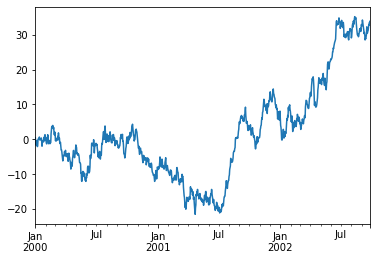

In [114]:
import matplotlib.pyplot as plt
plt.close("all")

ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot();

If running under Jupyter Notebook, the plot will appear on [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.plot.html#pandas.Series.plot). Otherwise use [`matplotlib.pyplot.show`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html) to show it or [`matplotlib.pyplot.savefig`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html) to write it to a file.

On a DataFrame, the [`plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot) method is a convenience to plot all of the columns with labels:

<Figure size 432x288 with 0 Axes>

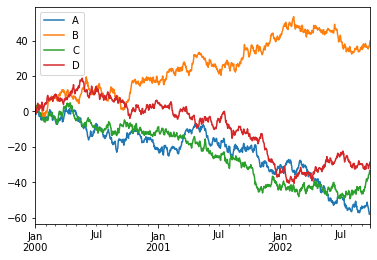

In [115]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()
plt.figure();
df.plot();
plt.legend(loc='best');

## Importing and exporting data

### CSV

[Writing to a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-store-in-csv): using [`DataFrame.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html#pandas.DataFrame.to_csv)

In [116]:
df.to_csv("foo.csv")

[Reading from a csv file](https://pandas.pydata.org/docs/user_guide/io.html#io-read-csv-table): using [`read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html#pandas.read_csv)

In [117]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.413030,1.670146,0.768710,0.242937
1,2000-01-02,-1.421083,2.340008,1.708741,1.093219
2,2000-01-03,-1.684770,1.933903,1.977001,-0.104429
3,2000-01-04,-1.336324,1.941208,2.798036,-0.934061
4,2000-01-05,-0.951288,2.595554,3.426638,0.526492
...,...,...,...,...,...
995,2002-09-22,-56.245391,36.135933,-35.771531,-31.558078
996,2002-09-23,-56.944974,36.982624,-35.397465,-30.738368
997,2002-09-24,-58.109647,36.971590,-34.396176,-30.043446
998,2002-09-25,-57.126478,38.980306,-33.300904,-29.019652


### Excel

Reading and writing to [Excel](https://pandas.pydata.org/docs/user_guide/io.html#io-excel).

Writing to an excel file using [`DataFrame.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html#pandas.DataFrame.to_excel):

In [118]:
df.to_excel("foo.xlsx", sheet_name="Sheet1")

Reading from an excel file using [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html#pandas.read_excel):

In [119]:
pd.read_excel("foo.xlsx", "Sheet1", index_col=None, na_values=["NA"])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.413030,1.670146,0.768710,0.242937
1,2000-01-02,-1.421083,2.340008,1.708741,1.093219
2,2000-01-03,-1.684770,1.933903,1.977001,-0.104429
3,2000-01-04,-1.336324,1.941208,2.798036,-0.934061
4,2000-01-05,-0.951288,2.595554,3.426638,0.526492
...,...,...,...,...,...
995,2002-09-22,-56.245391,36.135933,-35.771531,-31.558078
996,2002-09-23,-56.944974,36.982624,-35.397465,-30.738368
997,2002-09-24,-58.109647,36.971590,-34.396176,-30.043446
998,2002-09-25,-57.126478,38.980306,-33.300904,-29.019652
